In [1]:
import pandas as pd
import numpy as np


In [41]:
df=pd.read_csv('/content/results (1).csv')

In [42]:
df.head()

,Unnamed: 0,Hindi,English,Science,Maths,History,Geograpgy,Total,Results,Div
0,0,65,10,59,3,71,37,245,0,3
1,1,94,56,4,67,91,50,362,1,1
2,2,7,85,76,99,60,25,352,0,2
3,3,88,46,59,94,52,38,377,1,1
4,4,39,81,37,38,6,54,255,1,3


In [43]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  1000 non-null   int64
 1   Hindi       1000 non-null   int64
 2   English     1000 non-null   int64
 3   Science     1000 non-null   int64
 4   Maths       1000 non-null   int64
 5   History     1000 non-null   int64
 6   Geograpgy   1000 non-null   int64
 7   Total       1000 non-null   int64
 8   Results     1000 non-null   int64
 9   Div         1000 non-null   int64
dtypes: int64(10)
memory usage: 78.2 KB


In [44]:
df.columns


Index(['Unnamed: 0', 'Hindi', 'English', 'Science', 'Maths', 'History',
       'Geograpgy', 'Total', 'Results', 'Div'],
      dtype='object')

In [45]:
df.drop(columns=['Unnamed: 0','Total','Results'], inplace=True)

In [46]:
df.head()

,Hindi,English,Science,Maths,History,Geograpgy,Div
0,65,10,59,3,71,37,3
1,94,56,4,67,91,50,1
2,7,85,76,99,60,25,2
3,88,46,59,94,52,38,1
4,39,81,37,38,6,54,3


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [48]:
X = df[['Hindi', 'English', 'Science', 'Maths', 'History', 'Geograpgy']]
y = df['Div']

In [49]:

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
from sklearn.linear_model import LogisticRegression


model = LogisticRegression(max_iter=1000)


model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [51]:
y_pred = model.predict(X_test)

In [52]:
y_pred

array([3, 2, 3, 1, 3, 3, 2, 0, 0, 2, 3, 2, 0, 3, 1, 3, 1, 2, 2, 3, 2, 1,
       3, 2, 3, 1, 2, 1, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 3, 0, 0, 1, 2, 2,
       0, 2, 1, 2, 2, 2, 2, 2, 2, 1, 3, 2, 3, 0, 3, 1, 2, 2, 2, 1, 2, 3,
       0, 3, 1, 0, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 3, 3, 0, 0, 1, 3, 2, 3,
       2, 3, 3, 1, 3, 3, 1, 0, 2, 3, 3, 2, 1, 1, 2, 2, 0, 3, 2, 2, 2, 3,
       2, 2, 2, 0, 2, 2, 3, 1, 1, 0, 2, 2, 1, 1, 2, 2, 2, 3, 2, 1, 2, 1,
       2, 2, 0, 2, 2, 0, 0, 3, 2, 2, 2, 2, 3, 2, 1, 0, 1, 1, 0, 2, 1, 2,
       1, 3, 2, 2, 1, 2, 2, 2, 2, 2, 3, 0, 2, 0, 3, 2, 1, 2, 2, 0, 2, 3,
       3, 3, 2, 3, 3, 1, 3, 3, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 3, 1, 1, 0,
       3, 3])

In [53]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)

In [39]:
accuracy


0.97

In [54]:
conf_matrix = confusion_matrix(y_test, y_pred)

In [37]:
conf_matrix


array([[25,  1,  0,  4],
       [ 0, 33,  1,  0],
       [ 0,  0, 90,  0],
       [ 0,  0,  0, 46]])

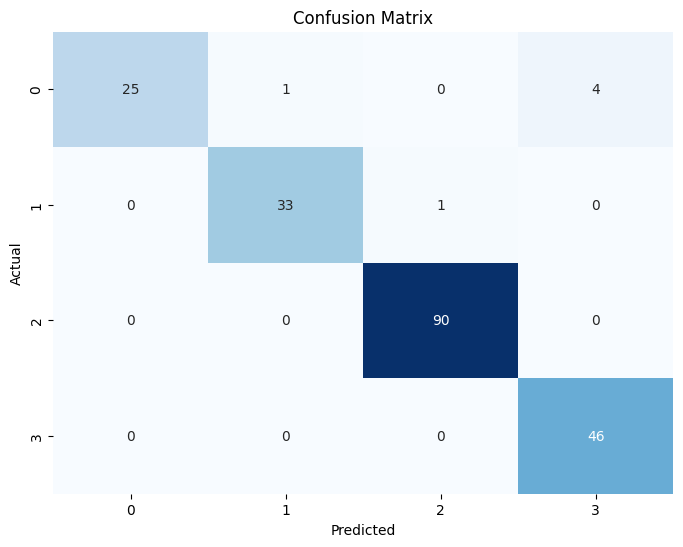

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# New Section